# Example reading THREDDS NCSS as point in Python


In [1]:
%matplotlib inline

In [2]:
import pandas as pd

First generate a sample RESTful URL using the NCSS Web Form:
http://data.ncof.co.uk/thredds/ncss/METOFFICE-NWS-AF-WAV-HOURLY/pointDataset.html

In [3]:
url = 'http://data.ncof.co.uk/thredds/ncss/METOFFICE-NWS-AF-WAV-HOURLY?var=VHM0&var=VHM0_SW1&var=VHM0_WW&latitude=61.15&longitude=-9.5&time_start=2017-06-02T00%3A00%3A00Z&time_end=2017-06-17T23%3A00%3A00Z&accept=csv'

Once you have the URL, it's easy to create a different one programmatically

In [4]:
latitude = 61.15
longitude = -9.5
time_start = '2017-06-02T00:00:00Z'
time_end =   '2017-06-17T23:00:00Z'

In [5]:
url = 'http://data.ncof.co.uk/thredds/ncss/METOFFICE-NWS-AF-WAV-HOURLY?var=VHM0&var=VHM0_SW1&var=VHM0_WW&latitude={}&longitude={}&time_start={}&time_end={}&accept=csv'.format(latitude,longitude,time_start,time_end)

In [6]:
df = pd.read_csv(url, parse_dates=True, index_col=0, na_values=[-32767.0], 
        skiprows=[0], names=['Lon','Lat','SigHeight(m)','Swell(m)','Wind Waves(m)'])

In [7]:
# drop lon,lat columns
df = df.drop(df.columns[[0,1]], axis=1)

In [8]:
df.head()

,SigHeight(m),Swell(m),Wind Waves(m)
2017-06-02 00:00:00,329.0,291.0,138.0
2017-06-02 01:00:00,332.0,300.0,124.0
2017-06-02 02:00:00,334.0,310.0,105.0
2017-06-02 03:00:00,335.0,313.0,99.0
2017-06-02 04:00:00,334.0,314.0,91.0


In [9]:
# Ugh, NCSS apparently ignores the scale_factor. Shite!  I'll report this bug, but in the meantime...
df = df/100.

In [10]:
df.head()

,SigHeight(m),Swell(m),Wind Waves(m)
2017-06-02 00:00:00,3.29,2.91,1.38
2017-06-02 01:00:00,3.32,3.00,1.24
2017-06-02 02:00:00,3.34,3.10,1.05
2017-06-02 03:00:00,3.35,3.13,0.99
2017-06-02 04:00:00,3.34,3.14,0.91


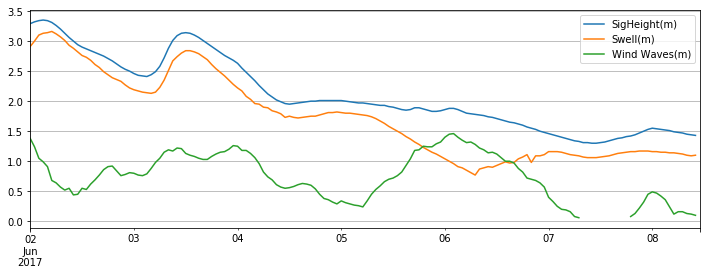

In [11]:
df.plot(figsize=(12,4),grid='on');